In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
from molsysmt import puw
import numpy as np
import matplotlib.pyplot as plt

# Least RMSD fit

Lets load a small molecular system with a 5000 frames trajectory to show how MolSysMT gets the RMSD, the least RMSD, or the least RMSD fitted structures over a reference frame.

In [3]:
h5_file = msm.demo['pentalanine']['traj.h5']
molecular_system = msm.convert(h5_file)

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [5]:
#msm.view(molecular_system, standardize=True)

## Least RMSD fit

The same method to compute the least RMSD [[1](#Coutsias2004)] implemented in `molsysmt.rmsd()` provides with the translational and rotational operators that makes the RMSD minimal. This two operators, applied to the original structure, results with the best fitted structure over the reference one. MolSysMT includes a specific function to execute this least RMSD fitting: `molsysmt.least_rmsd_fit()`. All input arguments of `molsysmt.rmsd()` can be used with `molsysmt.least_rmsd_fit()`. Lets see a couple of examples:

In [6]:
fitted_molecular_system = msm.structure.fit(molecular_system, selection='backbone',
                                            structure_indices='all', reference_structure_index=0,
                                            to_form='molsysmt.MolSys')

In [7]:
#msm.view(fitted_molecular_system, standardize=True)

Take heed to the input argument `to_form`, the above cell results with a new molecular system with the form specified by the former argument. Lets check the RMSD of the new frames over the frame 0-th. We can compare it with the result of `molsysmt.least_rmsd()`:

In [8]:
fitted_rmsd = msm.structure.get_rmsd(fitted_molecular_system, selection='backbone',
                                     structure_indices='all', reference_structure_index=0)

In [9]:
lrmsd = msm.structure.get_least_rmsd(molecular_system, selection='backbone',
                                     structure_indices='all', reference_structure_index=0)

/home/diego/MyMachine/locals/miniconda3/envs/MolSysMT@dprada_3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


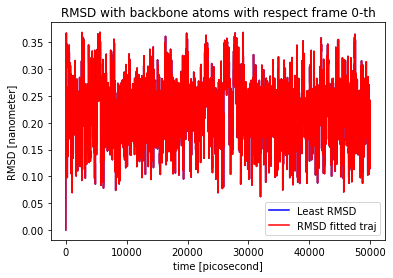

In [10]:
time = msm.get(molecular_system,  time=True)

plt.plot(time, lrmsd, color='blue', label='Least RMSD')
plt.plot(time, fitted_rmsd, color='red', label='RMSD fitted traj')
plt.xlabel('time [{}]'.format(puw.get_unit(time)))
plt.ylabel('RMSD [{}]'.format(puw.get_unit(lrmsd)))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

------------

<a id='Coutsias2004'>[1]</a>  [Coutsias, Evangelos A., Chaok Seok, and Ken A. Dill. "Using quaternions to calculate RMSD." Journal of computational chemistry 25, no. 15 (2004): 1849-1857](https://doi.org/10.1002/jcc.20110)